In [4]:
# connect to google drive for reading data
from google.colab import drive
drive.mount('/content/gd/')

Drive already mounted at /content/gd/; to attempt to forcibly remount, call drive.mount("/content/gd/", force_remount=True).


In [5]:
%cd /content/gd/MyDrive/6240
%pwd

/content/gd/MyDrive/6240


'/content/gd/MyDrive/6240'

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [7]:
# read the data
filename = "/content/gd/MyDrive/6240/SocialNetworkAds.csv"
dataset = pd.read_csv(filename)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
x = dataset.iloc[:,[0,1]].values
y = dataset.iloc[:,2].values

In [9]:
# preparing for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# fitting KNN on the training dataset
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
# prediting the Test set results
Y_pred = classifier.predict(X_test)


In [16]:
# making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[55,  3],
       [ 1, 21]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


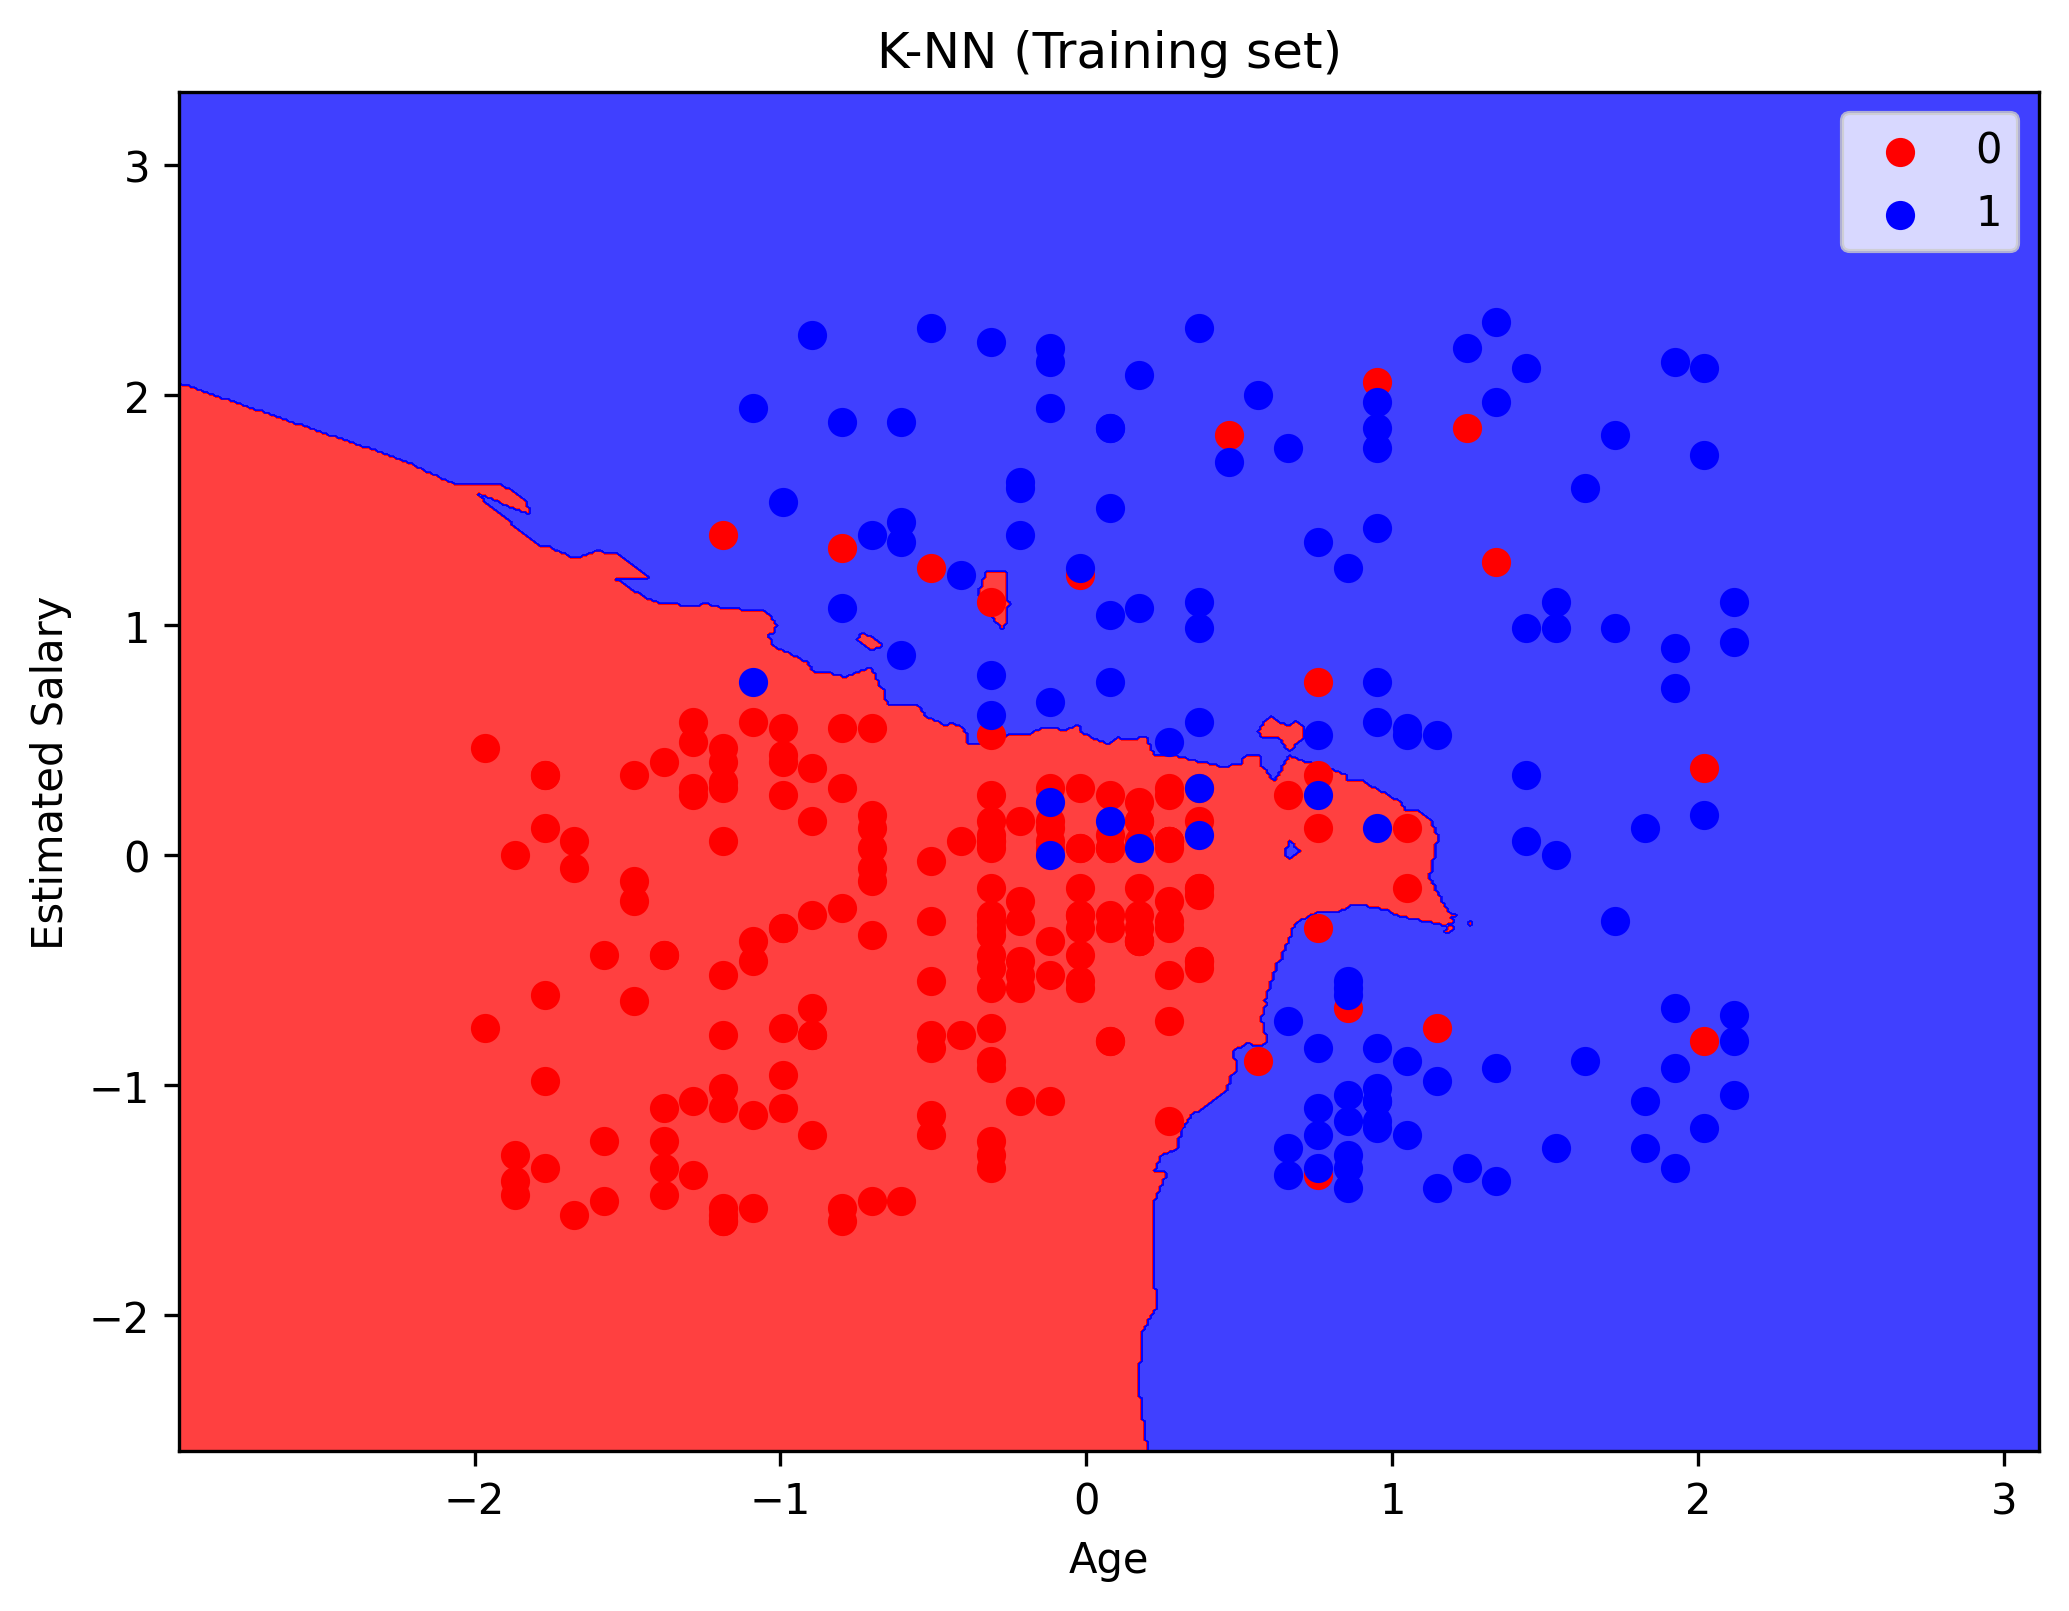

<Figure size 432x288 with 0 Axes>

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()
plt.savefig("KNN_training.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


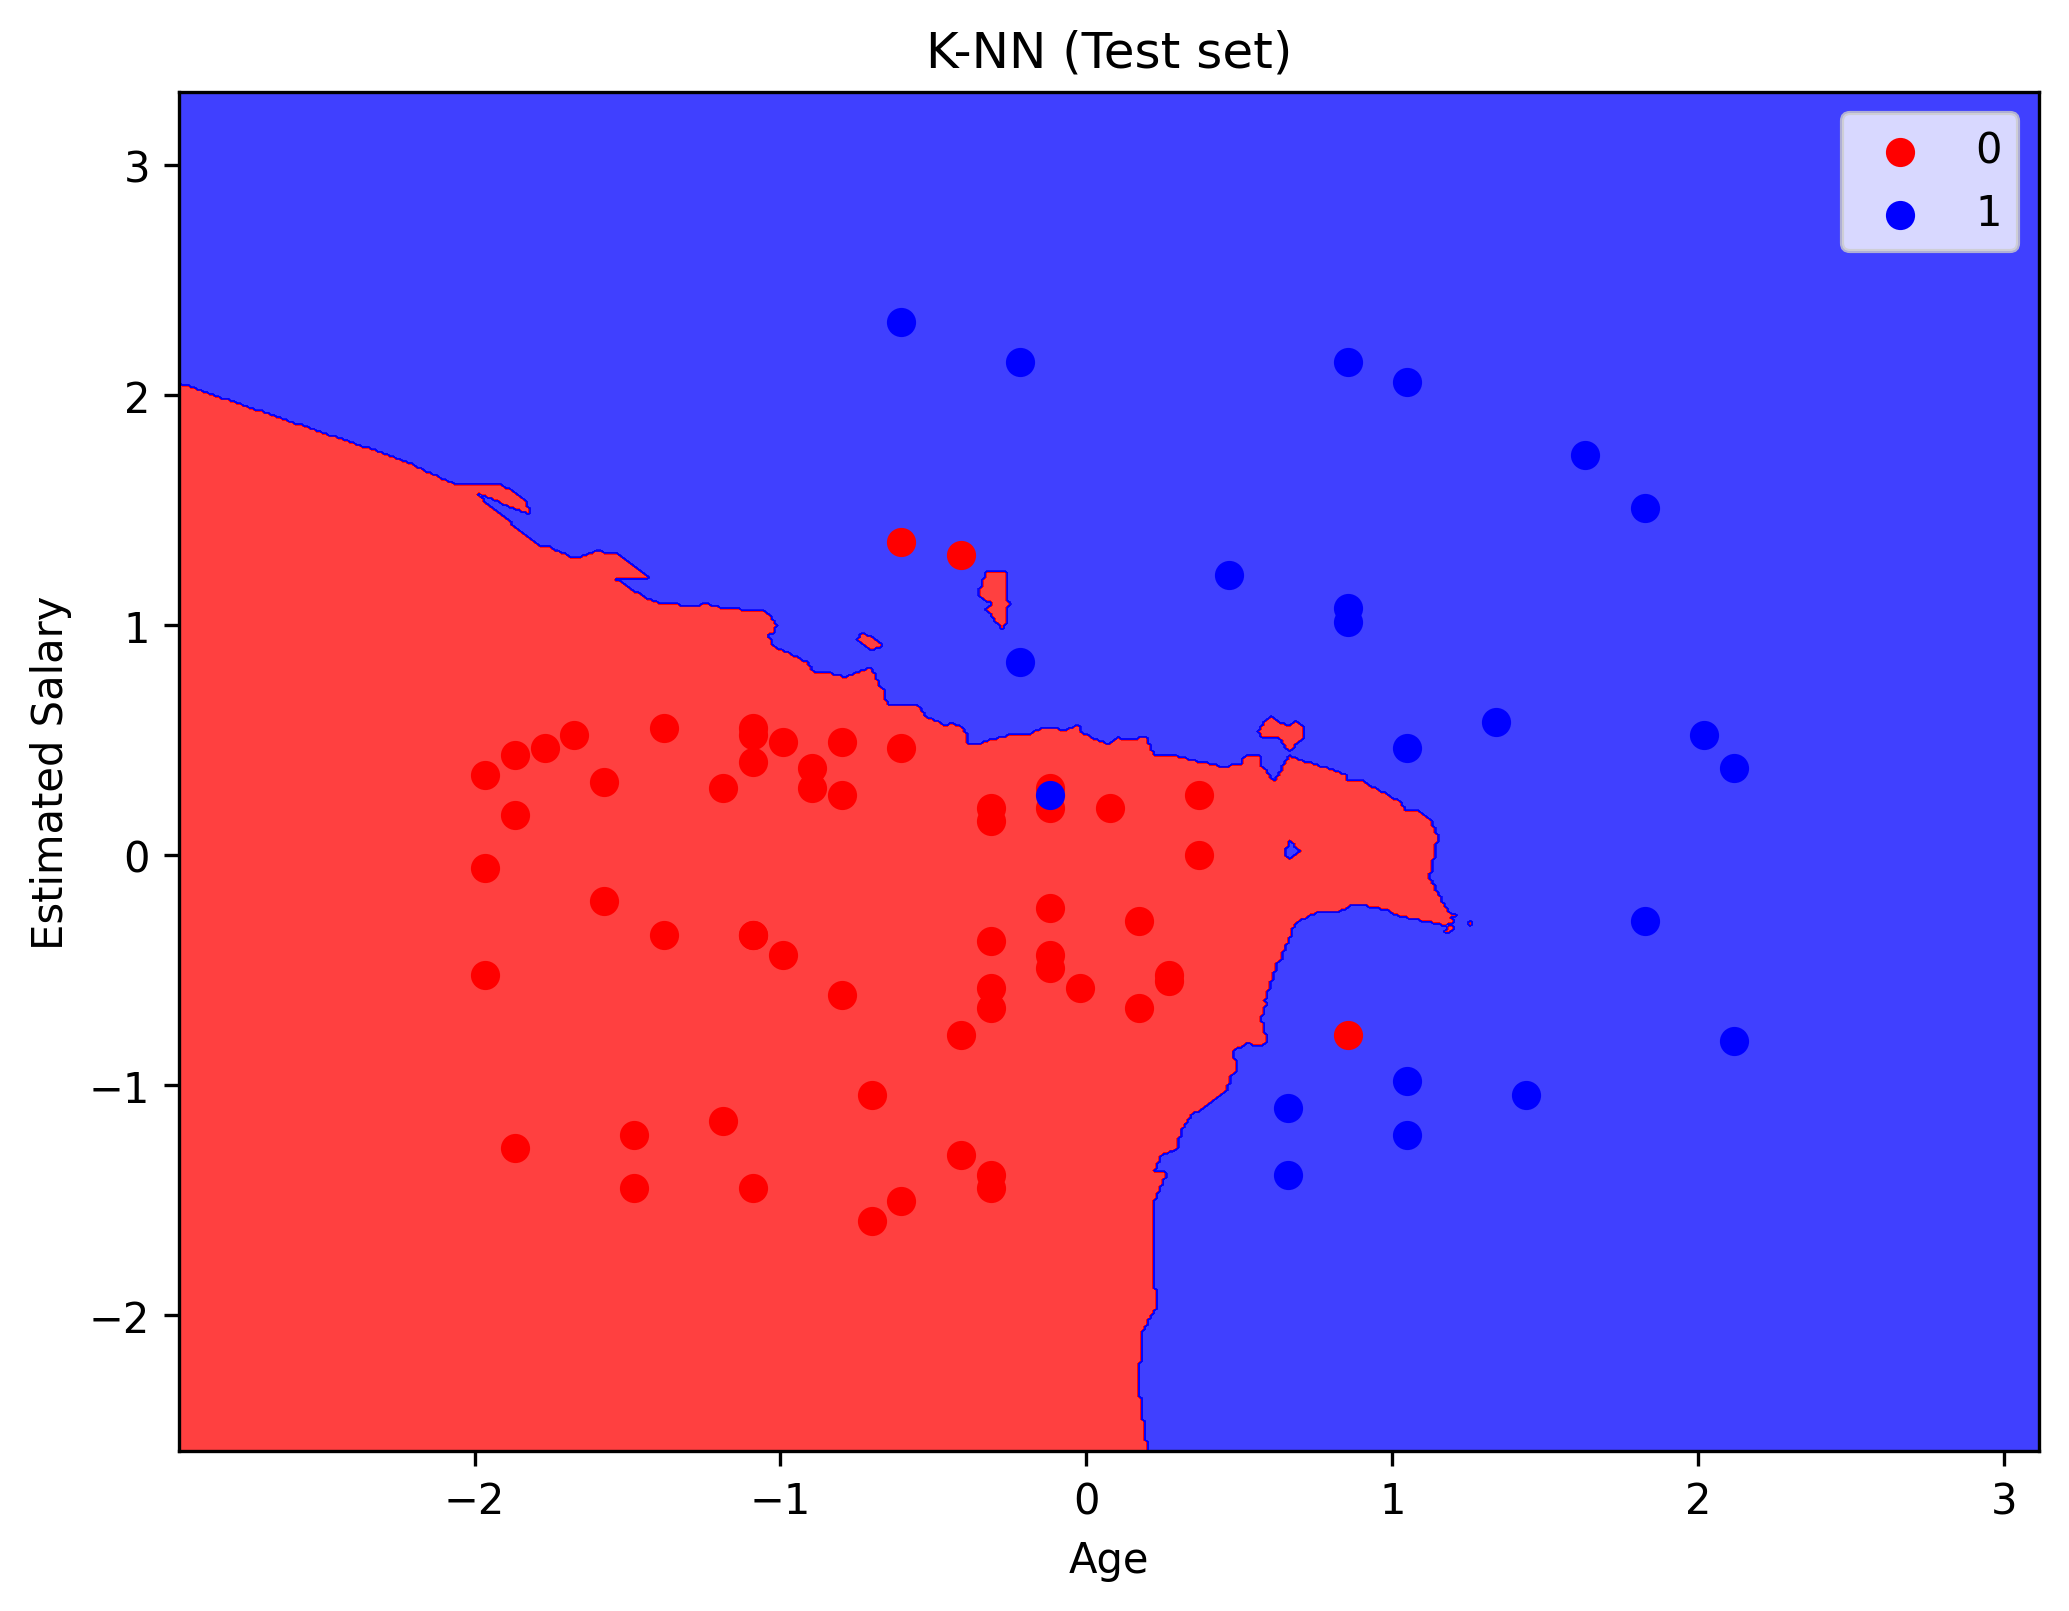

<Figure size 432x288 with 0 Axes>

In [26]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
plt.savefig("KNN_testing.png")

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
# precision = precision_score(Y_test, Y_pred, average='binary')
precision = precision_score(Y_test, Y_pred, labels=[1,2], average='micro')
recall = recall_score(Y_test, Y_pred, labels=[1,2], average='micro')
score = f1_score(Y_test, Y_pred, average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 0.875
Recall: 0.955
F-Measure: 0.913


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [33]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


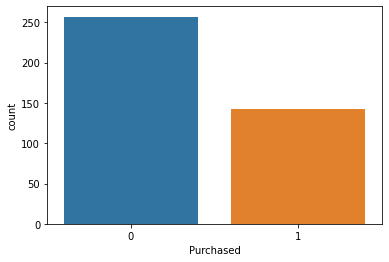

In [35]:
sns.countplot(x='Purchased', data=dataset)
plt.show()
# the label is slightly imbalanced

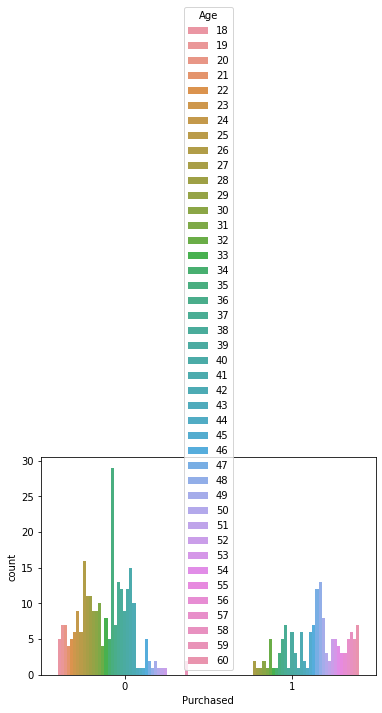

In [37]:
sns.countplot(x='Purchased', hue='Age', data=dataset)
plt.show()

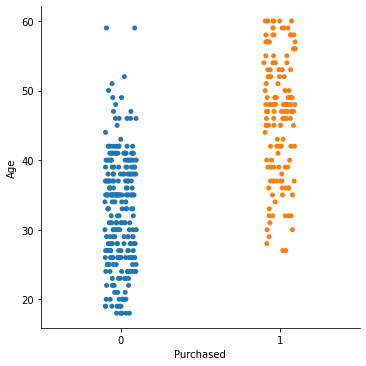

In [38]:
sns.catplot(x='Purchased', y='Age', data=dataset)
plt.show()

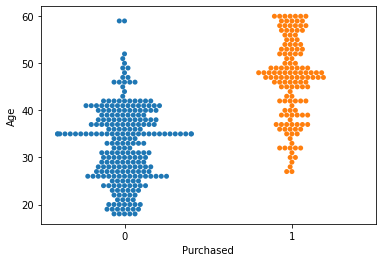

In [39]:
sns.swarmplot(x="Purchased", y="Age",data=dataset )
plt.show()

In [40]:
# using polynomial Kernel
from sklearn.svm import SVC
poly_model = SVC(kernel='poly', degree=3)

In [41]:
poly_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
Y_pred_poly = poly_model.predict(X_test)

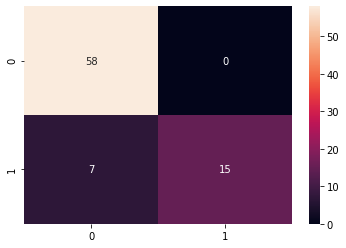

In [44]:
cf_matrix = confusion_matrix(Y_test, Y_pred_poly)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [45]:
precision = precision_score(Y_test, Y_pred_poly, labels=[1,2], average='micro')
recall = recall_score(Y_test, Y_pred_poly, labels=[1,2], average='micro')
score = f1_score(Y_test, Y_pred_poly, average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 1.000
Recall: 0.682
F-Measure: 0.811


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


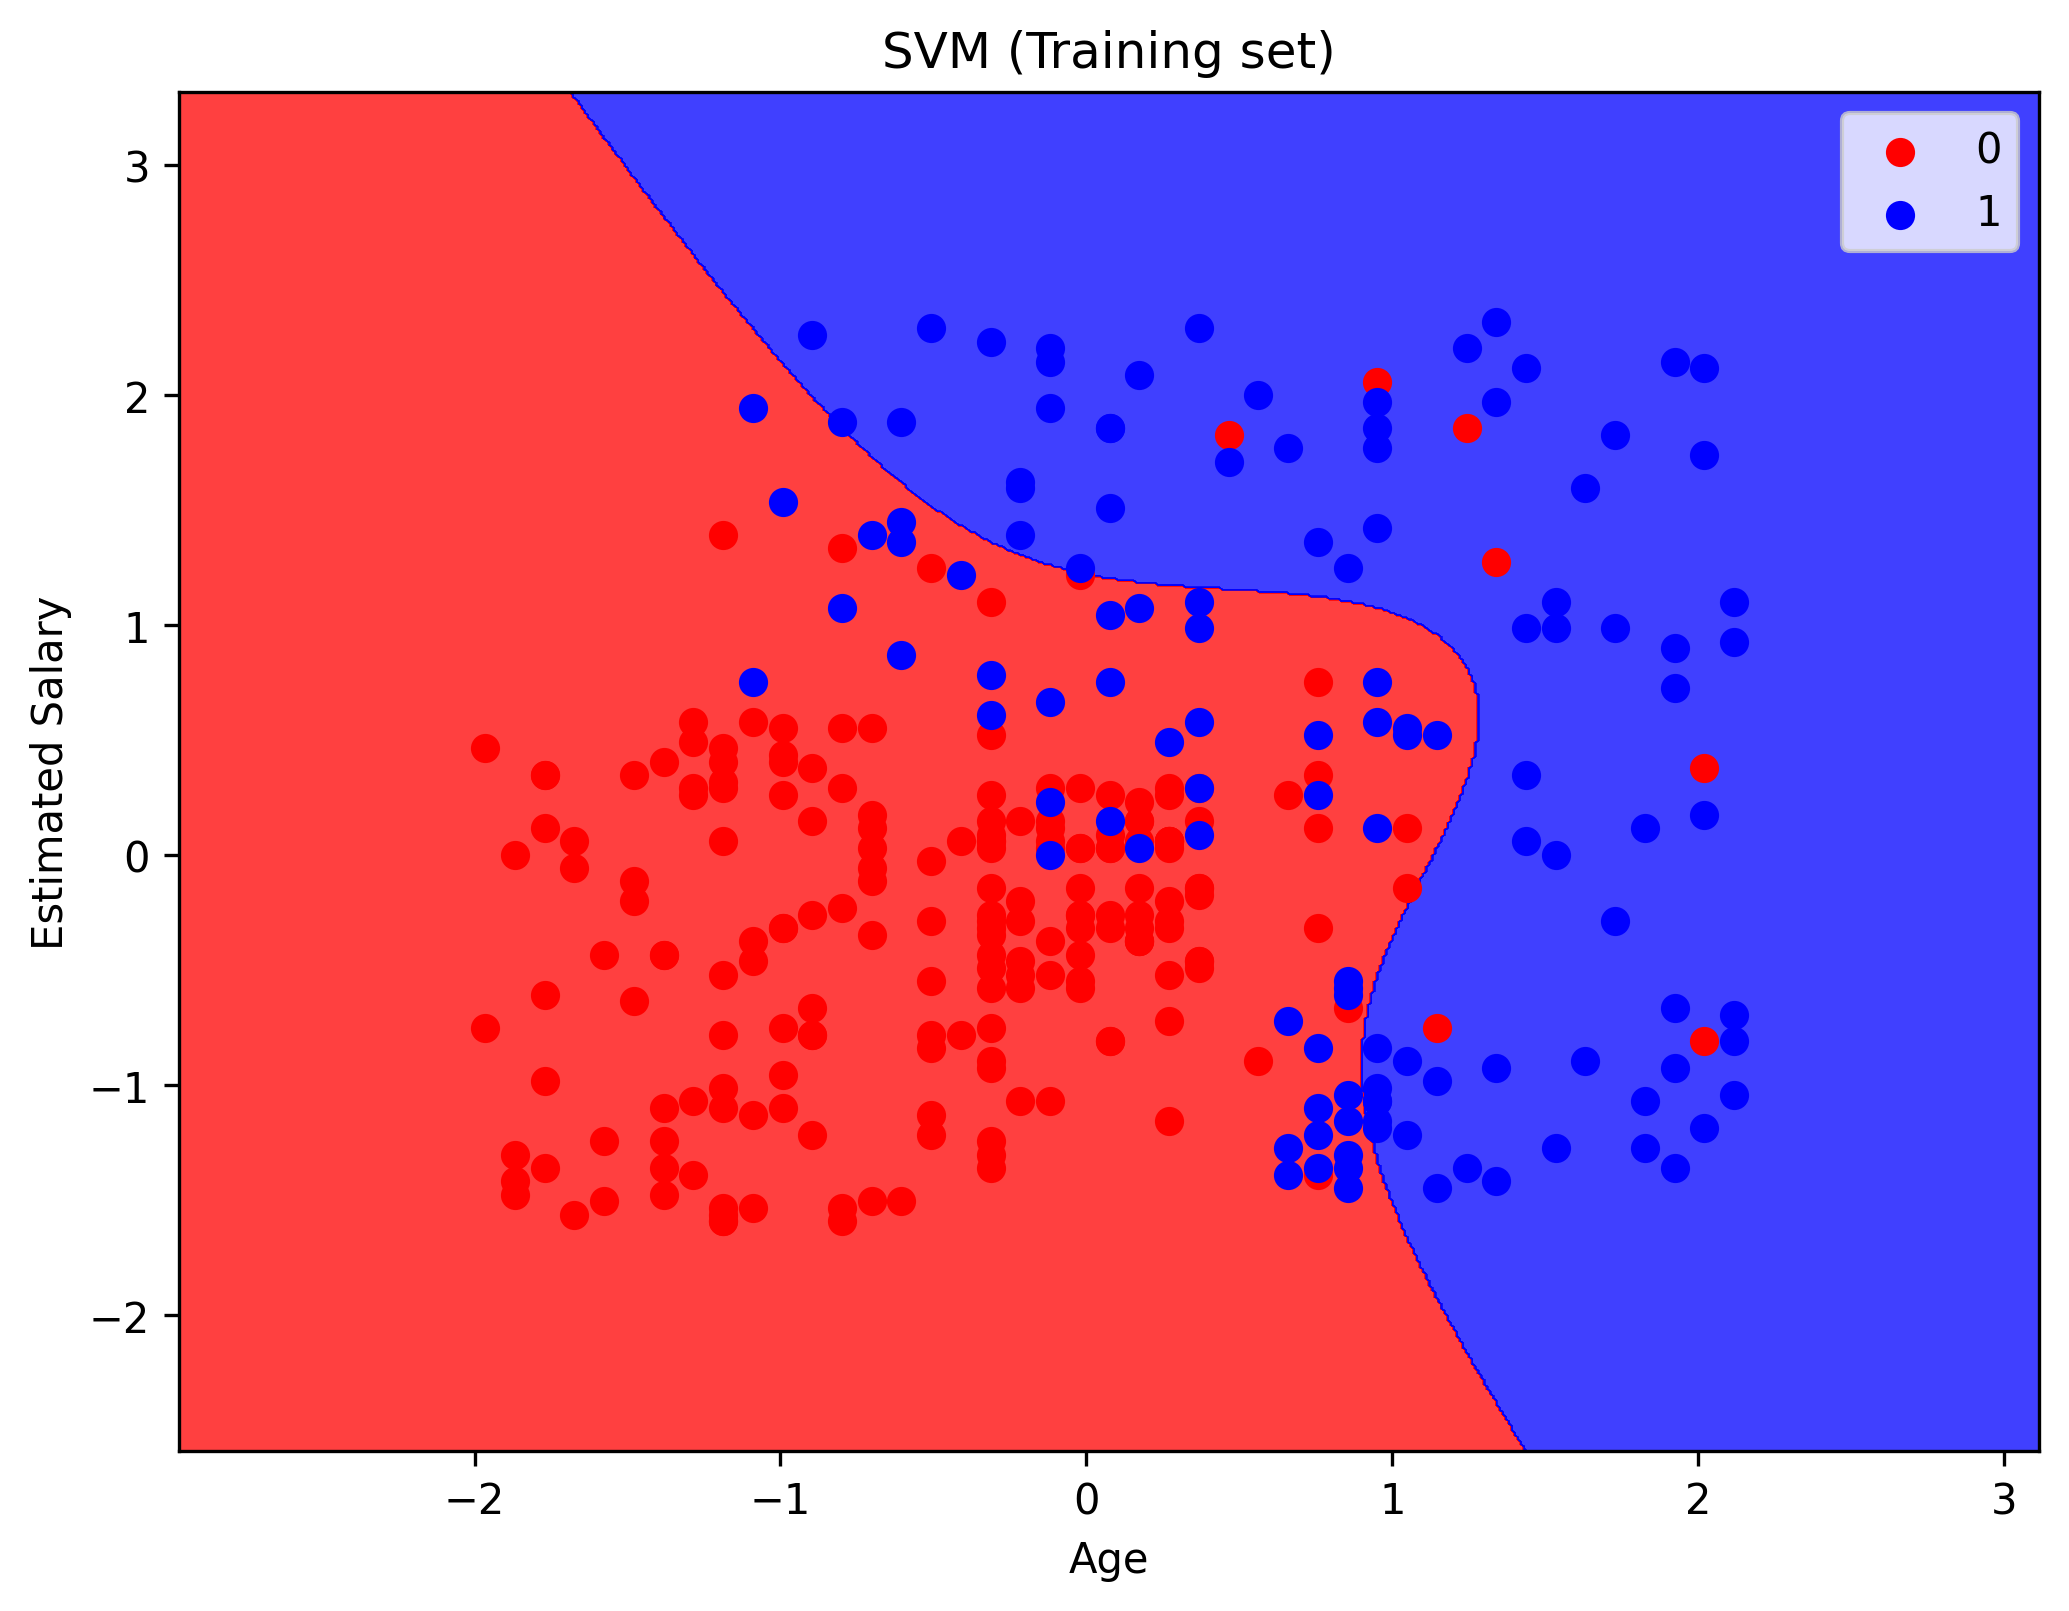

<Figure size 432x288 with 0 Axes>

In [47]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, poly_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()
plt.savefig("SVM_training.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


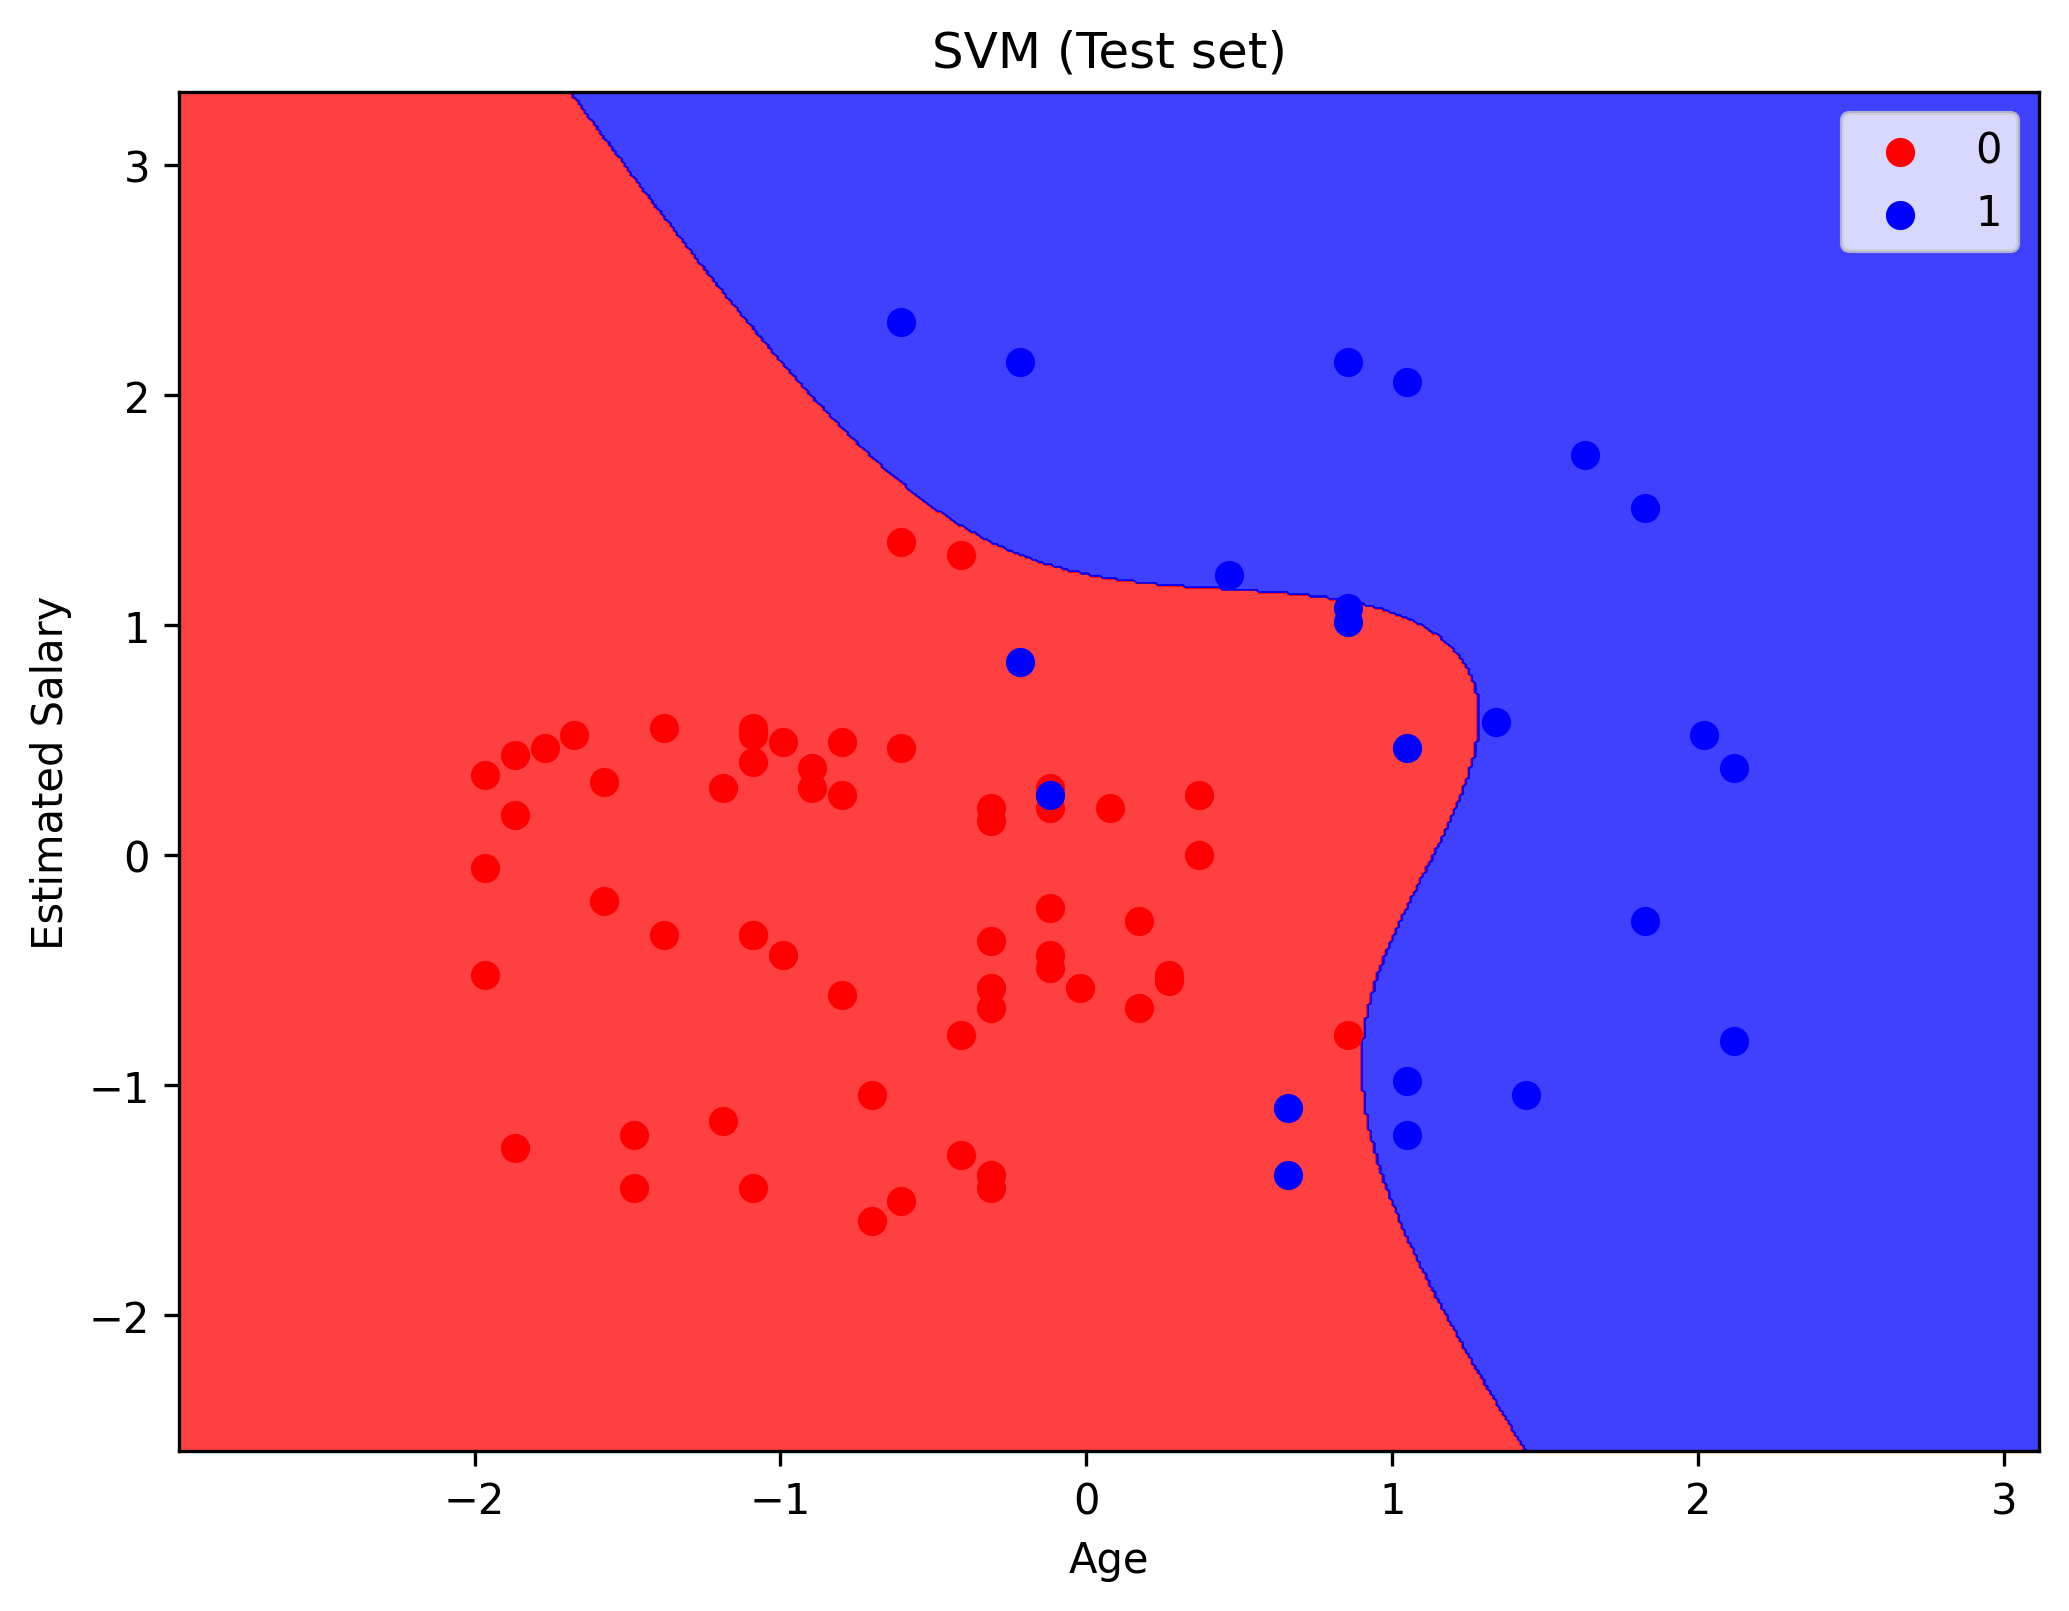

<Figure size 432x288 with 0 Axes>

In [48]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, poly_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
plt.savefig("SVM_testing.png")